In [1]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# describe basic statistics of the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
# Unique Value Analysis
for i in list(df.columns):
    print('{} -- {}'.format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


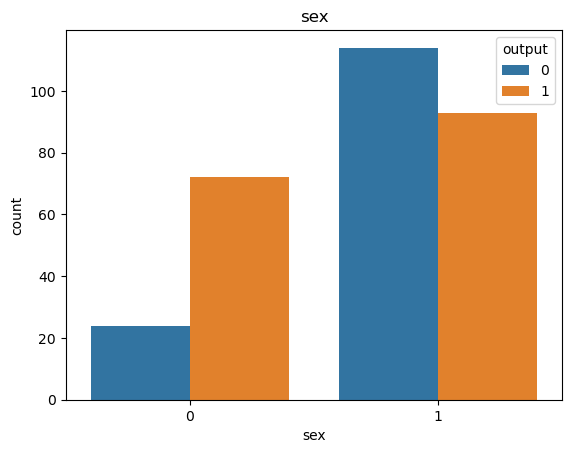

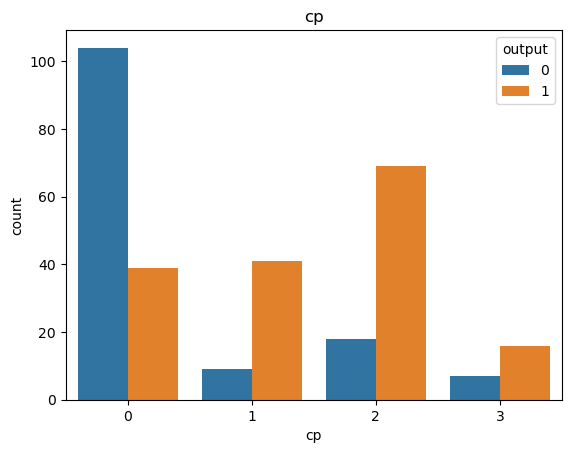

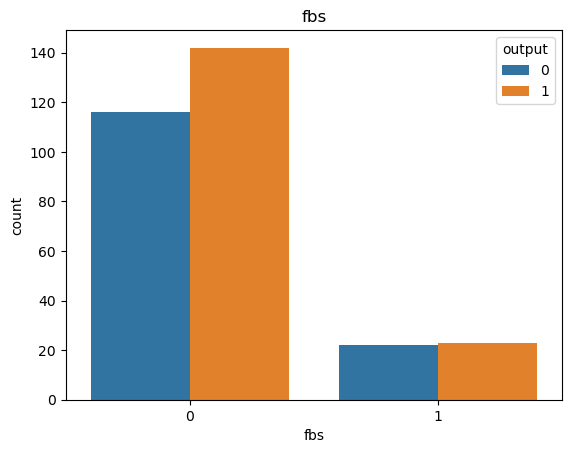

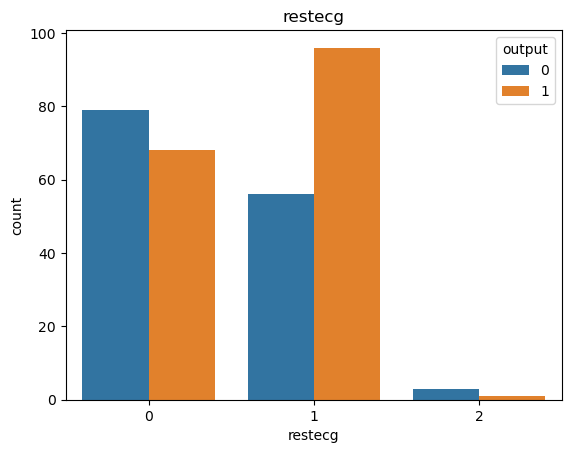

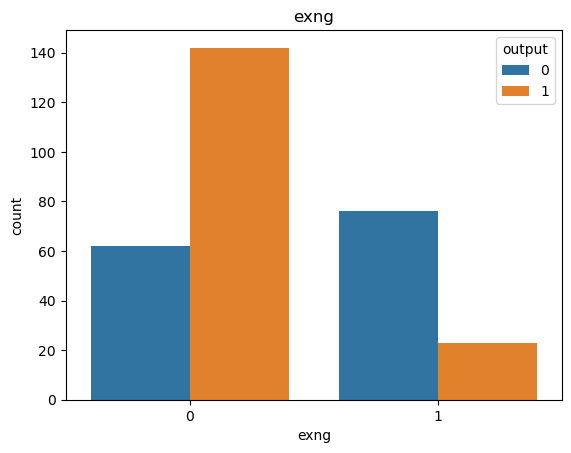

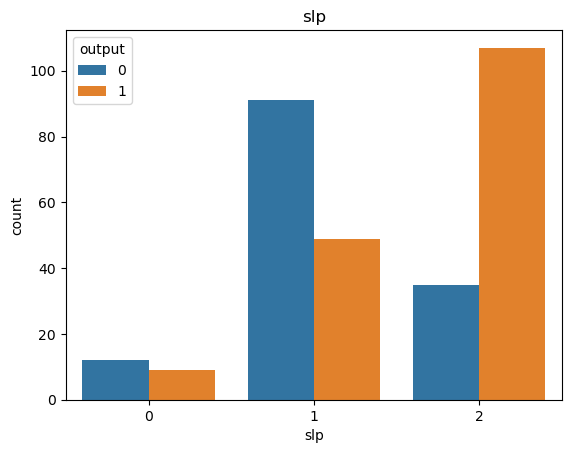

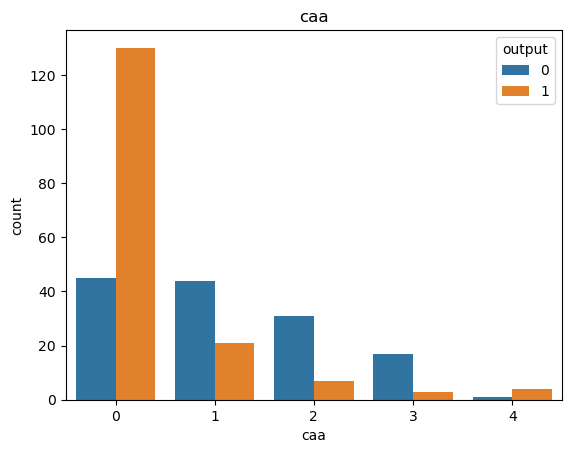

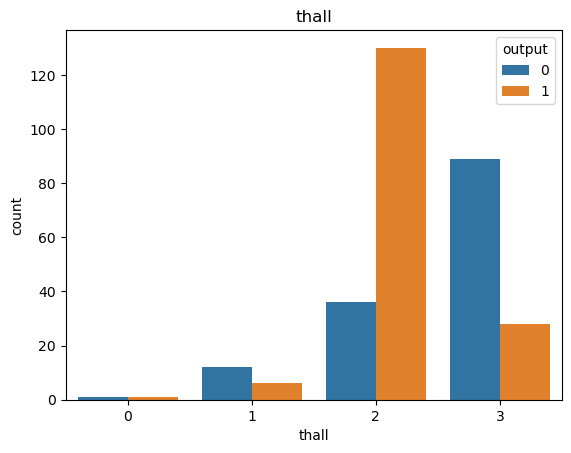

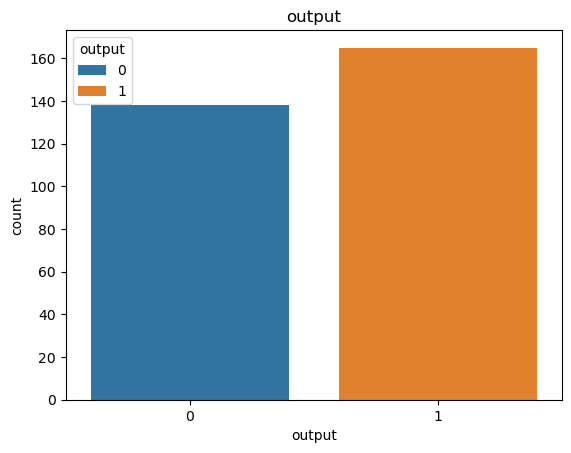

In [7]:
categorical_list = ['sex','cp','fbs', 'restecg', 'exng', 'slp', 'caa', 'thall','output']
df_categoric = df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data=df_categoric, hue='output')
    plt.title(i)

In [ ]:
# Numeric feature Analysis
numeric_list = ['age','trtbps','chol','thalachh','oldpeak','output']
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue='output',diag_kind='kde')
plt.show()

In [ ]:
# Standardization
scaler = StandardScaler()
scaler

In [ ]:
scaled_array = scaler.fit_transform(df[numeric_list]) # Numeric listin sonuna [:,-1] koymuslar sofistike diye
scaled_array                                          # Kod Calismiyordu aw

In [ ]:
pd.DataFrame(scaled_array).describe()

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list)
df_dummy.head()

In [ ]:
data_melted = pd.melt(df_dummy, id_vars='output', var_name='features', value_name='value')
data_melted.head(20)

In [ ]:
# Box plot
plt.figure()
sns.boxplot(x='features',y='value',hue='output',data=data_melted)
plt.show()

In [ ]:
# Swarm plot
plt.figure()
sns.swarmplot(x='features',y='value',hue='output',data=data_melted)
plt.show()

In [ ]:
# Catplot
sns.catplot(x='exng',y='age',hue='output',col='sex',kind='swarm',data=df)
plt.show()

In [ ]:
# Cerrelation analysis
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f',linewidths=.7)
plt.show()

In [ ]:
# Outlier detection
numeric_list = ['age','trtbps','chol','thalachh','oldpeak']
df_numeric = df.loc[:,numeric_list]
df_numeric.head()

In [ ]:
df.describe()

In [ ]:
# Outlier Detection
for i in numeric_list:
    # IQR
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)
    IQR = Q3 - Q1
    print('Old Shape: ', df.loc[:,i].shape)
    # Upper Bound
    upper = np.where(df.loc[:,i]>= (Q3 + 2.5*IQR))
    # Lower Bound
    lower = np.where(df.loc[:,i] <= (Q1 -2.5*IQR))
    print('{} --- {}'.format(upper, lower))
    try:
        df.drop(upper[0], inplace=True)
    except:
        print('KeyError {} not found in axis'.format(upper[0]))
    try:
        df.drop(lower[0], inplace=True)
    except:
        print('KeyError {} not found in axis'.format(lower[0]))
    print('New Shape: ', df.loc[:,i].shape)

In [ ]:
df1 = df.copy()

In [ ]:
df1 = pd.get_dummies(df1, columns= categorical_list, drop_first=True)
df1.head()

In [ ]:
x = df1.drop(['output_1'], axis=1)
y = df1['output_1']

In [ ]:
scaler = StandardScaler()

In [ ]:
x[numeric_list] = scaler.fit_transform(x[numeric_list])
x.head()

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

In [ ]:
logReg = LogisticRegression()
logReg

In [ ]:
# Fitting and Training
logReg.fit(xTrain,yTrain)

In [ ]:
# Calculate Probabilities
yPredProb = logReg.predict_proba(xTest)
yPredProb

In [ ]:
yPred = np.argmax(yPredProb, axis=1)
yPred

In [ ]:
print('Test Accuracy: {}'.format(accuracy_score(yTest, yPred)))

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(yTest, yPredProb[:,1])

In [ ]:
# Plot Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [ ]:
lr = LogisticRegression()
lr

In [ ]:
penalty = ['l1','l2']
parameters = {'penalty': penalty}

In [ ]:
lr_searcher = GridSearchCV(lr, parameters)

In [ ]:
lr_searcher.fit(xTrain, yTrain)

In [ ]:
print('Best Parameters: ',lr_searcher.best_params_,lr_searcher.best_score_)

In [ ]:
yPred = lr_searcher.predict(xTest)

In [ ]:
print('Test accuracy: ', accuracy_score(yTest,yPred))